   X  Y month  day  FFMC   DMC     DC  ISI  temp  RH  wind  rain  area
0  7  5   mar  fri  86.2  26.2   94.3  5.1   8.2  51   6.7   0.0   0.0
1  7  4   oct  tue  90.6  35.4  669.1  6.7  18.0  33   0.9   0.0   0.0
2  7  4   oct  sat  90.6  43.7  686.9  6.7  14.6  33   1.3   0.0   0.0
3  8  6   mar  fri  91.7  33.3   77.5  9.0   8.3  97   4.0   0.2   0.0
4  8  6   mar  sun  89.3  51.3  102.2  9.6  11.4  99   1.8   0.0   0.0
X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64
5-Fold Cross Validation using cross_val_score()
Linear Regression - Mean RMSE: 55.6451, Std RMSE: 31.8700
Lasso - Mean RMSE: 54.1803, Std RMSE: 33.0457
Ridge - Mean RMSE: 55.3870, Std RMSE: 32.0907
ElasticNet - Mean RMSE: 54.0546, Std RMSE: 33.1067

5-Fold Cross Validation using cross_val_predict()
Linear Regression - RMSE: 64.1980
Lasso - RMSE: 63.5400
Ridge - RMSE: 64.0857
ElasticNet - RMSE: 63.4646

Evaluation o

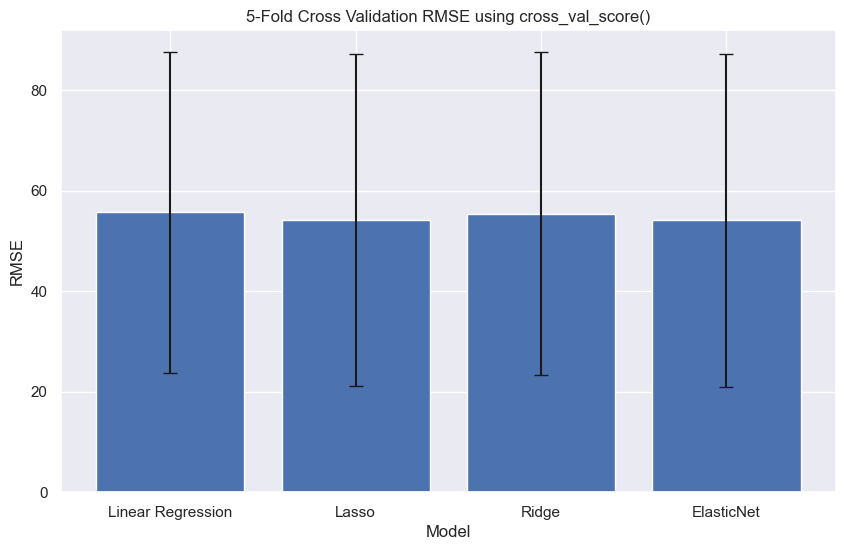

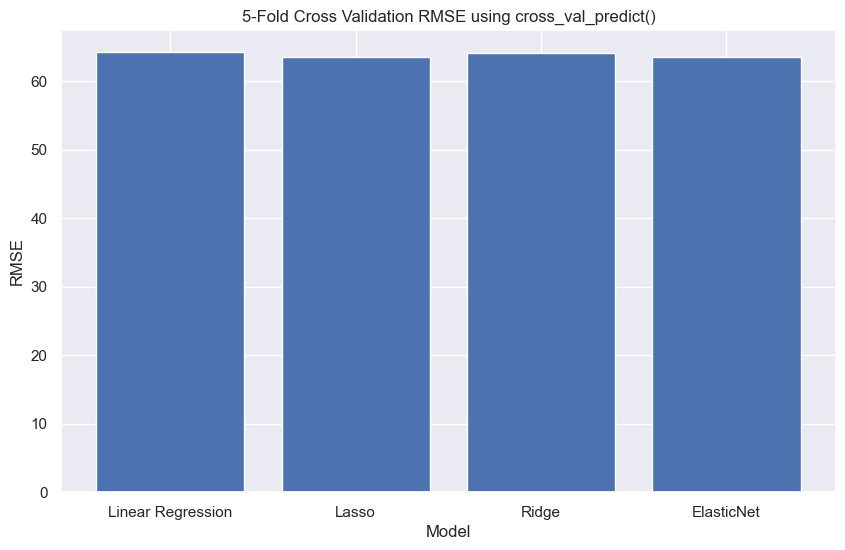

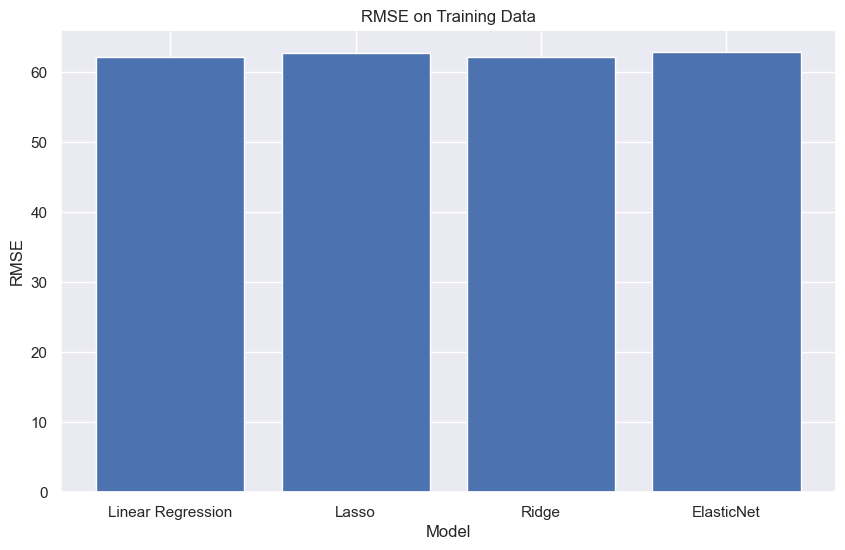

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

# Set plot style using Seaborn
sns.set(style='darkgrid')

# URL of the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv'

# Load the dataset
df = pd.read_csv(url)

# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Prepare the data
# Select features and target variable
X = df.drop(columns=['area'])  # Drop the target variable 'area'
y = df['area']  # Target variable

# Convert categorical variables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Ensure all data is numeric
X = X.apply(pd.to_numeric)
y = pd.to_numeric(y)

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'ElasticNet': ElasticNet()
}

# Initialize KFold with 5 splits
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 5-Fold Cross Validation using cross_val_score()
print("5-Fold Cross Validation using cross_val_score()")
results_cv_score = {}
for name, model in models.items():
    mse_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-mse_scores)
    mean_rmse = np.mean(rmse_scores)
    std_rmse = np.std(rmse_scores)
    results_cv_score[name] = (mean_rmse, std_rmse)
    print(f'{name} - Mean RMSE: {mean_rmse:.4f}, Std RMSE: {std_rmse:.4f}')

# Perform 5-Fold Cross Validation using cross_val_predict()
print("\n5-Fold Cross Validation using cross_val_predict()")
results_cv_predict = {}
for name, model in models.items():
    y_pred = cross_val_predict(model, X, y, cv=kf)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results_cv_predict[name] = rmse
    print(f'{name} - RMSE: {rmse:.4f}')

# Evaluate the results
print("\nEvaluation of Models")
results_train = {}
for name, model in models.items():
    model.fit(X, y)
    y_pred = model.predict(X)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    results_train[name] = rmse
    print(f'{name} - RMSE on Training Data: {rmse:.4f}')

# Plotting the results
# Plot results from cross_val_score
plt.figure(figsize=(10, 6))
cv_score_means = [results_cv_score[name][0] for name in models.keys()]
cv_score_stds = [results_cv_score[name][1] for name in models.keys()]
plt.bar(models.keys(), cv_score_means, yerr=cv_score_stds, capsize=5)
plt.title('5-Fold Cross Validation RMSE using cross_val_score()')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

# Plot results from cross_val_predict
plt.figure(figsize=(10, 6))
cv_predict_rmse = [results_cv_predict[name] for name in models.keys()]
plt.bar(models.keys(), cv_predict_rmse)
plt.title('5-Fold Cross Validation RMSE using cross_val_predict()')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

# Plot results from training data evaluation
plt.figure(figsize=(10, 6))
train_rmse = [results_train[name] for name in models.keys()]
plt.bar(models.keys(), train_rmse)
plt.title('RMSE on Training Data')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

# Perform Linear Regression using StatsModels for additional insights
X_sm = sm.add_constant(X)  # Add a constant term for the intercept
model_sm = sm.OLS(y, X_sm).fit()
print(model_sm.summary())

In [ ]:
# Data Preprocessing
def preprocess_data(df):
    # Select relevant features
    features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year']
    
    # Create a copy of the dataframe
    processed_df = df.copy()
    
    # Handle missing values
    imputer = SimpleImputer(strategy='median')
    
    # Select features
    X = processed_df[features].values
    
    # Impute missing values
    X = imputer.fit_transform(X)
    
    # Normalize features
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Prepare target (Rank)
    y = processed_df['Rank'].values
    
    return X_scaled, y, scaler

# Prepare the data
X_scaled, y, scaler = preprocess_data(df)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

# Advanced Neural Network for Regression
class RankPredictor(nn.Module):
    def __init__(self, input_size):
        super(RankPredictor, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    
    def forward(self, x):
        return self.network(x)

# Instantiate the model
model = RankPredictor(input_size=X_train.shape[1])

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
def train_model(model, X_train, y_train, X_test, y_test, criterion, optimizer, epochs=200):
    # Move tensors to appropriate device
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    X_train, y_train = X_train.to(device), y_train.to(device)
    X_test, y_test = X_test.to(device), y_test.to(device)
    
    # Training mode
    model.train()
    
    for epoch in range(epochs):
        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        
        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Validation
        if (epoch + 1) % 20 == 0:
            model.eval()
            with torch.no_grad():
                val_outputs = model(X_test)
                val_loss = criterion(val_outputs, y_test)
                
                # Calculate Mean Absolute Error
                mae = torch.mean(torch.abs(val_outputs - y_test))
                
                print(f'Epoch [{epoch+1}/{epochs}]')
                print(f'Training Loss: {loss.item():.4f}')
                print(f'Validation Loss: {val_loss.item():.4f}')
                print(f'Mean Absolute Error: {mae.item():.4f}\n')
            
            model.train()

# Train the model
train_model(model, X_train_tensor, y_train_tensor, X_test_tensor, y_test_tensor, criterion, optimizer)

# Prediction function
def predict_game_rank(model, game_data, scaler):
    # Prepare and scale the input
    game_scaled = scaler.transform(game_data.reshape(1, -1))
    game_tensor = torch.FloatTensor(game_scaled)
    
    # Get prediction
    model.eval()
    with torch.no_grad():
        predicted_rank = model(game_tensor)
    
    return predicted_rank.item()

# Example prediction
new_game_features = np.array([20.0, 15.0, 5.0, 2.0, 42.0, 2010.0])
predicted_rank = predict_game_rank(model, new_game_features, scaler)
print(f"Predicted Rank for New Game: {predicted_rank}")

# Additional model evaluation
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor)
    # Calculate R-squared (coefficient of determination)
    ss_total = torch.sum((y_test_tensor - torch.mean(y_test_tensor)) ** 2)
    ss_residual = torch.sum((y_test_tensor - test_predictions) ** 2)
    r_squared = 1 - (ss_residual / ss_total)
    print(f"R-squared: {r_squared.item():.4f}")

FileNotFoundError: [Errno 2] No such file or directory: 'vgsales.csv'